# Multiple Linear Regression

For a multiple linear regression the number of feature $x_j^{(i)}$ is at least greater than 1.

$$ \textbf{x}^{(i)} = \left( x_1^{(i)}, x_2^{(i)}, \ldots, x_n^{(i)} \right) \tag{1} \ ,$$

where $n$ is the total number of feature and $i= 1 \ldots m$ is the number of training examples.

Assume here we have only one training example $(i=1)$ and the number of total features is $n$ the linear model is

$$ f_{\textbf{w},b}(\textbf{x}) = w_1 x_1 + w_2 x_2 + w_3 x_3 + \ldots + w_n x_n  + b \tag{2} \ . $$

The general `linear model` to make the prediction looks as follow:

$$ f_{\textbf{w},b}(\textbf{x}^{(i)}) = \textbf{w} \cdot \textbf{x}^{(i)} + b \tag{3} \ , $$

where $\textbf{w}$ , $\mathbf{x}^{(i)}$ are vectors now and the symbol $\cdot$ is the `vector dot product`.

The `cost function` $J$ for the multiple linear regression yields to

$$ J(\textbf{w},b) = \frac{1}{2m} \sum_i^m (f_{\textbf{w},b}(\textbf{x}^{(i)}) - y^{(i)})^2 = \frac{1}{2m} \sum_i^m (\textbf{w} \cdot \textbf{x}^{(i)} + b - y^{(i)})^2 \tag{4} \ .$$

For the gradient descent the `partial derivates` for the parameter $\mathbf{w}, b$ need be calculated.

$$ \frac{\partial}{\partial \mathbf{w}_j} J(\textbf{w},b) = \frac{1}{m} \sum_i^m (\textbf{w} \cdot \textbf{x}^{(i)} + b - y^{(i)}) x_j^{(i)} \tag{5} \ ,$$

$$ \frac{\partial}{\partial b} J(\textbf{w},b) = \frac{1}{m} \sum_i^m (\textbf{w} \cdot \textbf{x}^{(i)} + b - y^{(i)}) \tag{6} \ .$$

Evaluating the the partial derivatives of the cost function will give the following for $\mathbf{w}$ and $b$

$$\mathbf{w}_j = \mathbf{w}_j - \alpha \cdot \frac{1}{m} \sum_i^m (\textbf{w} \cdot \textbf{x}^{(i)} + b - y^{(i)}) x_j^{(i)} \tag{7} \ , $$

$$b = b - \alpha \cdot \frac{1}{m} \sum_i^m (\textbf{w} \cdot \textbf{x}^{(i)} + b - y^{(i)}) \tag{9} \ . $$

## Example Problem

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

In this example the price of the house not only depends on the feature *size* but also on *number of bedroom, number of floor* and *age of home*. In total there are **4 features**. The number of given **traning examples** are **3**.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import numpy.typing as npt

get_ipython().run_line_magic('matplotlib', 'notebook')

## Traning data

In [2]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

## Define Cost-Function

In [3]:
def compute_cost(X,y,w,b):

    m = X.shape[0] # number of training examples
    
    sum_cost = 0
    
    for i in range(m):
        fwb = np.dot(w,X[i])+ b
        sum_i = (fwb - y[i])**2
        sum_cost = sum_cost + sum_i

    cost_value = sum_cost/(2*m)
    
    return cost_value

## Define Function for Gradient Caluclation

In [4]:
def compute_gradient(X,y,w,b):
    
    m = X.shape[0] # number of training examples
    n = X.shape[1] # number of features
    
    sum_dw = np.zeros(n)
    sum_db = 0
    
    for i in range(m):
        cost = np.dot(w,X[i])+ b - y[i]
        sum_db += cost
        for j in range(n):
            sum_dw[j] = sum_dw[j] + cost * X[i,j]
        
    dj_dw = sum_dw/m    
    dj_db = sum_db/m
    
    return dj_db, dj_dw

## Define Gradient Descent Function for Optimizating the Parameter

In [5]:
def gradient_descent(X,y,w_init,b_init,alpha,cost_function,gradient_function,num_iter):
    
    w = w_init
    b = b_init
    J_history = []
    w_history = []
    b_history = []
    
    for i in range(num_iter):
        # compute cost value
        J_history.append(compute_cost(X,y,w,b))
        
        # compute gradient
        dj_db, dj_dw = compute_gradient(X,y,w,b)
        
        # update parameter w and b
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        w_history.append(w)
        b_history.append(b)
        
    return w, b, J_history, w_history, b_history

## Run Gradient Descent Algorithm

In [36]:
X = X_train
y = y_train

b_init = 0.
w_init = np.array([ -2.73e-03, -6.27e-06, -2.22e-06, -6.92e-05])

cost_function = compute_cost
gradient_function = compute_gradient

alpha = 5.0e-
num_iter = 1000

w,b,J_history,w_history, b_history = gradient_descent(X,y,w_init,b_init,alpha,cost_function,gradient_function,num_iter)

## Optimized Parameter Value Pair

In [37]:
print(f'Optimized values for w : {w}')
print(f'Optimized value for b : {b:0.3f}')

Optimized values for w : [ 0.20234987  0.00079468 -0.00098511 -0.00212507]
Optimized value for b : -0.000


## Comparison Predicted vs. Target Values

In [34]:
for i in range(X_train.shape[0]):
    y_pred = np.dot(w,X[i])+ b
    print(f'Predicted value: {y_pred:0.1f}, target value: {y_train[i]}')

Predicted value: 426.2, target value: 460
Predicted value: 286.2, target value: 232
Predicted value: 171.5, target value: 178


## Visualize Cost-Function

<IPython.core.display.Javascript object>


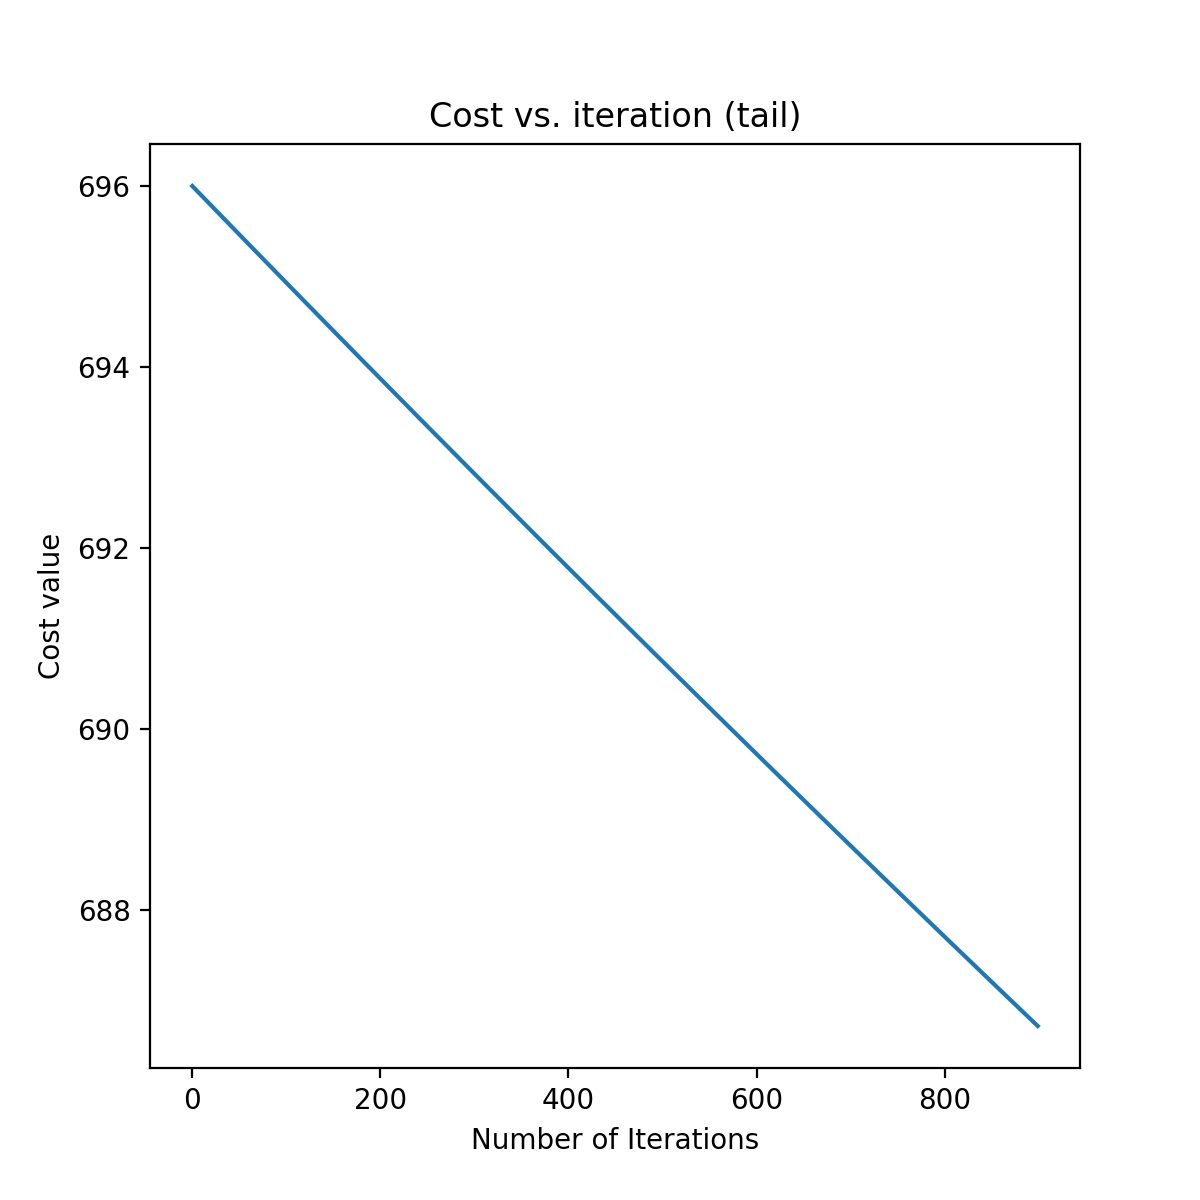

In [24]:
plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(np.arange(len(J_history[100:])),J_history[100:])

ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Cost value')
ax.set_title("Cost vs. iteration (tail)")

plt.show()